           X           Y
0  28.816847   60.854133
1  35.757619   67.590670
2  53.821076  110.762773
3  58.215693  115.785785
4  66.809748  125.311129
5  78.252814  149.003866
6  80.648697  159.619414
7  81.296082  157.985286
8  95.724162  197.179636
9  99.958481  196.907397


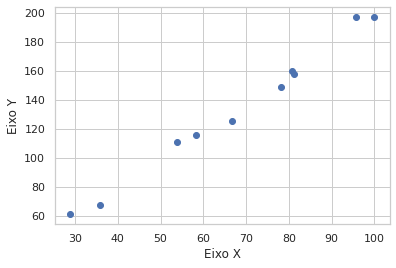

[[28.81684742]
 [35.75761893]
 [53.82107634]
 [58.21569264]
 [66.80974831]
 [78.25281369]
 [80.64869706]
 [81.29608217]
 [95.72416241]
 [99.95848131]]
[[ 60.85413282]
 [ 67.59066954]
 [110.76277271]
 [115.78578459]
 [125.31112852]
 [149.00386554]
 [159.61941373]
 [157.98528569]
 [197.17963609]
 [196.90739698]]


In [96]:
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)

import matplotlib.pyplot as plt # biblioteca para plotar gráficos
plt.rc("font", size=14)

import seaborn as sns # biblioteca de visualização de dados
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('exemplo.csv',header=0)
print(data)

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X'], data['Y'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

print(X)
print(Y)

media X   :  67.93012202823
media X^2 :  5124.991702295573
media Y   :  134.10000862119998
media Y^2 :  19994.153430738115
media XY  :  10117.850602443814

teta0  -0.08892359520725088
teta1  1.975396601829183

Equação da Reta: Y =  -0.08892359520725088  +  1.975396601829183  * X


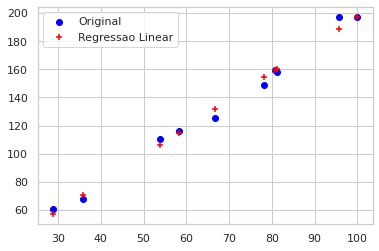

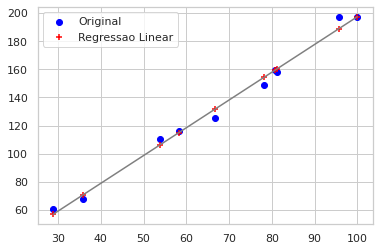

In [97]:
mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 = (mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

print('media X   : ',np.mean(X))
print('media X^2 : ',np.mean(X**2))
print('media Y   : ',np.mean(Y))
print('media Y^2 : ',np.mean(Y**2))
print('media XY  : ',np.mean(X*Y))
print()
print('teta0 ',teta0)
print('teta1 ',teta1)
print()
print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.legend(['Original', 'Regressao Linear'])
plt.show()

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.savefig('reta_prevista.png')
plt.legend(['Original', 'Regressao Linear'])
plt.show()

### Letra a
Calculando o erro quadrático médio.

In [98]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(X, Y)
teta1 = reg.coef_[0]
teta0 = reg.intercept_


print()
print('teta0: ',teta0)
print('teta1: ',teta1)
print()
print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X

print("Erro quadrado médio:", mean_squared_error(Y,Y_pred_media))



teta0:  [-0.0889236]
teta1:  [1.9753966]

Equação da Reta: Y =  [-0.0889236]  +  [1.9753966]  * X
Erro quadrado médio: 19.310387739177333


### Letra b
Dividindo o dataset em 70% e 30% teste

In [99]:
from sklearn import *

# Importando o dataset
data = pd.read_csv('exemplo.csv',header=0)
print("Dataset Original")
print(data)
print()

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

# Seperando o teste e treinamento
train =  0.7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = train, shuffle=True)

# Mostrando o conjunto de treinamento
AB = np.concatenate((X_train, Y_train), axis = 1)
df = pd.DataFrame(AB, columns=['X', 'Y'])
print("Dataset Treinamento")
print(df)
print()

# Mostrando o conjunto de teste
AB = np.concatenate((X_test, Y_test), axis = 1)
df = pd.DataFrame(AB, columns=['X', 'Y'])
print("Dataset Teste")
print(df)

Dataset Original
           X           Y
0  28.816847   60.854133
1  35.757619   67.590670
2  53.821076  110.762773
3  58.215693  115.785785
4  66.809748  125.311129
5  78.252814  149.003866
6  80.648697  159.619414
7  81.296082  157.985286
8  95.724162  197.179636
9  99.958481  196.907397

Dataset Treinamento
           X           Y
0  35.757619   67.590670
1  28.816847   60.854133
2  99.958481  196.907397
3  66.809748  125.311129
4  95.724162  197.179636
5  53.821076  110.762773
6  80.648697  159.619414

Dataset Teste
           X           Y
0  81.296082  157.985286
1  78.252814  149.003866
2  58.215693  115.785785



teta0:  [-0.65701681]
teta1:  [1.99946051]

Equação da Reta: Y =  [-0.65701681]  +  [1.99946051]  * X
Erro quadrado médio: 20.511028483148255


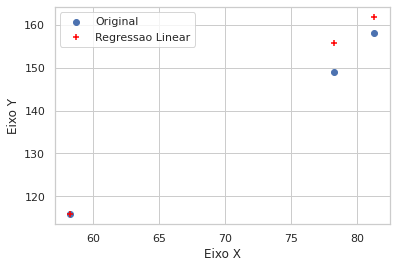

In [100]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

teta1 = reg.coef_[0]
teta0 = reg.intercept_


print()
print('teta0: ',teta0)
print('teta1: ',teta1)
print()
print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X_test

print("Erro quadrado médio:", mean_squared_error(Y_test,Y_pred_media))

plt.scatter(X_test, Y_test ,cmap='blue')
plt.scatter(X_test, Y_pred_media,marker='+',color='red') #pontos previstos

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('x1.png')
plt.legend(['Original', 'Regressao Linear'])
plt.show()


## Questao 2

### Letra a

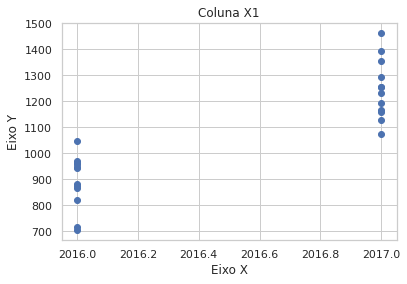

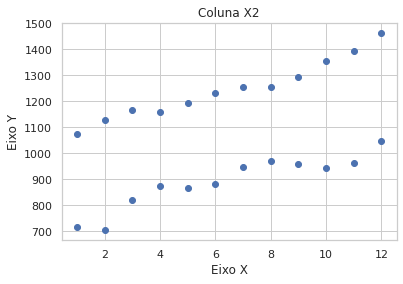

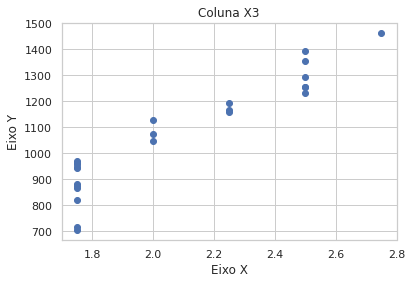

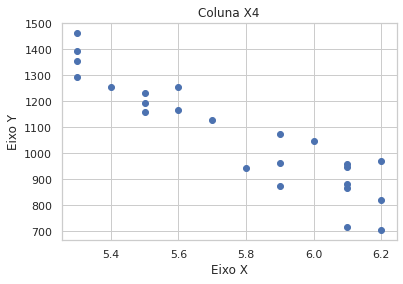

In [101]:
data = pd.read_csv('multi.csv',header=0)

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
Xs = []
Y = data.iloc[:, 4].values.reshape(-1, 1) 
for i in range(4):
    Xs.append(data.iloc[:, i].values.reshape(-1, 1) )

for idx, x in enumerate(Xs):
    plt.scatter(x, Y,cmap='blue')
    plt.title("Coluna X{}".format(idx+1))
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.savefig('x{}.png'.format(idx+1))
    plt.show()


### Letra b


teta0  [883.12878788]
teta1  [28.76223776]

Equação da Reta: Y =  [883.12878788]  +  [28.76223776]  * X
Erro quadrado médio: 32700.73606254856


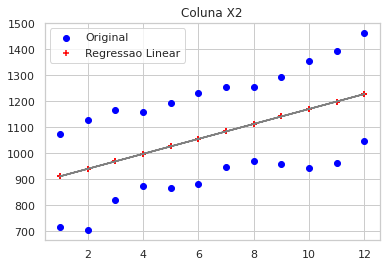

--------------------------------------------------------------------------------

teta0  [-99.46431881]
teta1  [564.20389249]

Equação da Reta: Y =  [-99.46431881]  +  [564.20389249]  * X
Erro quadrado médio: 5289.701729996909


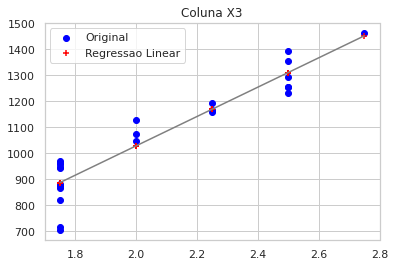

--------------------------------------------------------------------------------

teta0  [4471.33932136]
teta1  [-588.96207585]

Equação da Reta: Y =  [4471.33932136]  +  [-588.96207585]  * X
Erro quadrado médio: 6353.776447105782


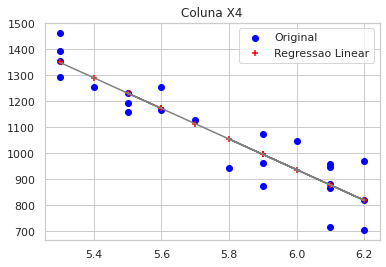

--------------------------------------------------------------------------------


In [102]:
Xs.pop(0)
for idx, x in enumerate(Xs):
    reg = linear_model.LinearRegression()
    reg.fit(x, Y)
    teta1 = reg.coef_[0]
    teta0 = reg.intercept_

    print()
    print('teta0 ',teta0)
    print('teta1 ',teta1)
    print()
    print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

    # plotando os pontos previstos e a reta
    Y_pred_media = teta0+teta1*x
    print("Erro quadrado médio:", mean_squared_error(Y,Y_pred_media))
    
    plt.scatter(x, Y,marker='o',color='blue')  #pontos originais
    plt.scatter(x, Y_pred_media,marker='+',color='red') #pontos previstos
    plt.plot(x, Y_pred_media, color='gray')
    plt.title("Coluna X{}".format(idx+2))
    plt.savefig('reta_prevista.png')
    plt.legend(['Original', 'Regressao Linear'])
    plt.show()
    print(80*"-")

### Letra c


teta0  [873.33184855]
teta1  [20.37861915]

Equação da Reta: Y =  [873.33184855]  +  [20.37861915]  * X
Erro quadrado médio: 68530.28239443258


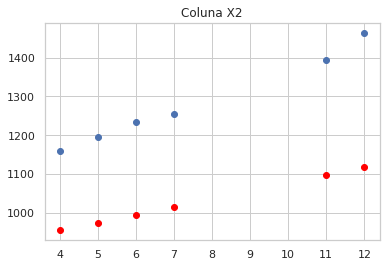

--------------------------------------------------------------------------------

teta0  [-66.21568627]
teta1  [548.82352941]

Equação da Reta: Y =  [-66.21568627]  +  [548.82352941]  * X
Erro quadrado médio: 7431.548298731254


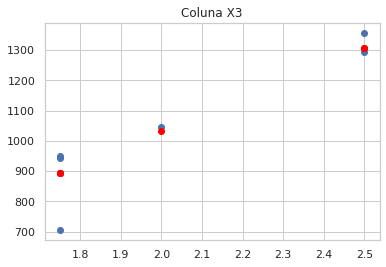

--------------------------------------------------------------------------------

teta0  [4931.40689238]
teta1  [-667.96856106]

Equação da Reta: Y =  [4931.40689238]  +  [-667.96856106]  * X
Erro quadrado médio: 13218.914162508076


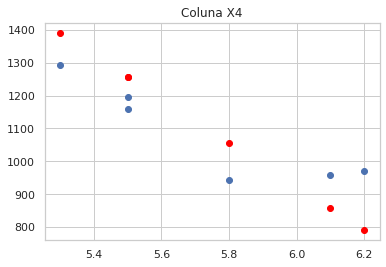

--------------------------------------------------------------------------------


In [103]:

for idx, x in enumerate(Xs):

    # Dividindo em 75% treinamento e 25% teste
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, Y, train_size = 0.75)

    # Instanciando a Regreção Linear
    reg = linear_model.LinearRegression()
    # Treinando os dados 
    reg.fit(X_train, Y_train)
    # Pegando os tetas
    teta1 = reg.coef_[0]
    teta0 = reg.intercept_

    print()
    print('teta0 ',teta0)
    print('teta1 ',teta1)
    print()
    print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

    # Pontos previstos pela RL
    Y_pred_media = teta0+teta1*X_test

    print("Erro quadrado médio:", mean_squared_error(Y_test,Y_pred_media))

    # Plotando os pontos originais do teste
    plt.scatter(X_test, Y_test ,cmap='blue')

    # Plotando os pontos previstos pelo RL
    plt.scatter(X_test, Y_pred_media,color='red') #pontos previstos

    plt.title("Coluna X{}".format(idx+2))
    plt.savefig('reta_prevista.png')
    plt.legend(['Original', 'Regressao Linear'])
    plt.show()
    print(80*"-")